In [8]:
%matplotlib inline
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

In [9]:
subprocess.call("./textReader2")

NameError: name 'Output' is not defined

In [2]:
df = pd.read_csv('fortune500.csv')

In [3]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [4]:
df.columns=['year','rank','company','revenue','profit']

In [5]:
len(df)

25500

In [6]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [7]:
non_numeric_profits=df.profit.str.contains('[^0-9.-]')
df.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [8]:
set(df.profit[non_numeric_profits])

{'N.A.'}

In [9]:
len(df.profit[non_numeric_profits])

369

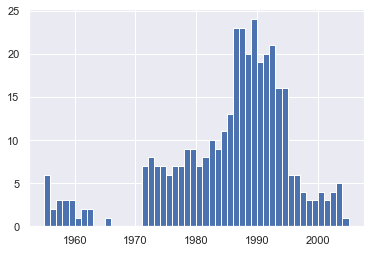

In [10]:
bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits], bins=range(1955, 2006))

In [11]:
df=df.loc[~non_numeric_profits]
df.profit=df.profit.apply(pd.to_numeric)

In [12]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [26]:
group_by_year=df.loc[:,['year','revenue','profit']].groupby('year')
avgs=group_by_year.mean()
x=avgs.index
y1=avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0,y=0)

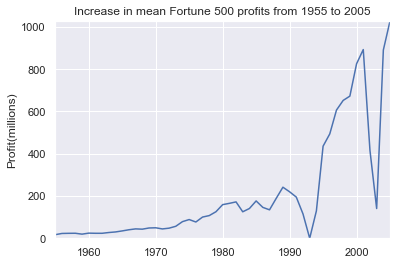

In [27]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 profits from 1955 to 2005', 'Profit(millions)')

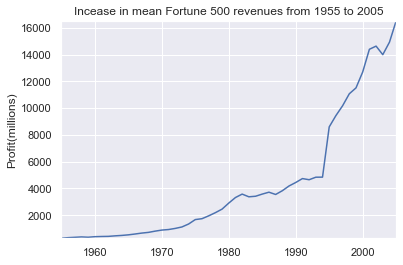

In [29]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Incease in mean Fortune 500 revenues from 1955 to 2005', 'Profit(millions)')

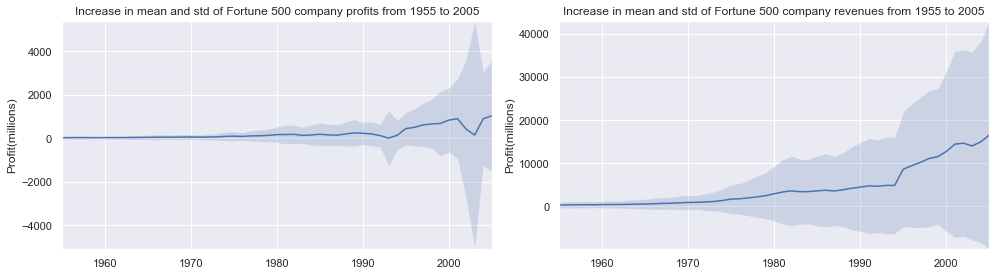

In [45]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y-stds, y+stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std of Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit(millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Profit(millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

In [46]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [47]:
%ls

Hamming Distance/               RosalindBioinfoHammingDistance/
MendelsFirstLaw.ipynb           RosalindPython3Dir/
MessingWithJupyter2.ipynb       RosalindPython4Dir/
MessingWithNotebooks.ipynb      RosalindPython5Dir/
Output.txt                      Untitled.ipynb
Permutations.py*                Untitled1.ipynb
Rabbits.py                      fortune500.csv
RosalindBioinfo1/               textReader*
RosalindBioinfo2/               textReader2*


In [52]:
%%latex
Some important equations:$E = mc^2$
$e^{i pi} = -1$


$P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$

<IPython.core.display.Latex object>